In [73]:
## Exploration and Analysis of the Data Workbook

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [74]:
## Load Cleaned Data
df = pd.read_csv('data/cfb_conference_members.csv')

df.describe()

df.columns

df['Conference'].value_counts()

Conference USA                  46
Sun Belt Conference             42
Western Athletic Conference     28
Missouri Valley Conference      27
American Athletic Conference    21
ACC                             20
Big Ten Conference              19
SEC                             16
Mountain West Conference        14
Southwest Conference            13
Big 8 Conference                12
Pac-12 Conference               12
Big East Conference             11
Pacific Coast Conference        10
Border Conference                9
Skyline Conference               9
Ivy League                       8
Name: Conference, dtype: int64

In [75]:
# Rename columns Institution -> School
df.rename(columns={'Institution': 'School'}, inplace=True)

def clean_school_names(dataframe):
    # 1. Remove annotations
    dataframe['School'] = dataframe['School'].str.replace(r'\[\w+\]', '', regex=True).str.strip()
    
    # 2. Standardize school names
    name_mapping = {
        'Brigham Young University(BYU)': 'Brigham Young University',
        'California State University, Fresno(Fresno State)': 'California State University, Fresno',
        'University of Oklahoma[b]': 'University of Oklahoma',
        'University of Texas at Arlington(UT Arlington)': 'University of Texas at Arlington',
        'University of Texas at El Paso(UTEP)': 'University of Texas at El Paso',
        'University of Texas at San Antonio(UTSA)': 'University of Texas at San Antonio'
    }
    dataframe['School'] = dataframe['School'].replace(name_mapping)
    
    # 3. Remove placeholders and non-school entries
    non_school_entries = ['Institution', 'East Division', 'West Division']
    dataframe = dataframe[~dataframe['School'].isin(non_school_entries)]
    
    return dataframe

# Apply the cleaning function
df = clean_school_names(df)

In [76]:
df['School'].value_counts()

# df['Conference'].value_counts()

# df.info()

University of Louisville                     5
Tulane University                            4
Florida Atlantic University                  4
University of North Carolina at Charlotte    4
University of Cincinnati                     4
                                            ..
Harvard University                           1
Princeton University                         1
Yale University                              1
Butler University                            1
Sam Houston State                            1
Name: School, Length: 213, dtype: int64

In [77]:
## Save the dataframe to a csv file
# df.to_csv('data/cfb_scores_all_years.csv', index=False)

In [78]:
cfb_data = pd.read_csv('data/cfb_scores_all_years.csv')

C:\Users\Justin\AppData\Local\Temp\ipykernel_9304\1384732769.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  cfb_data = pd.read_csv('data/cfb_scores_all_years.csv')


In [79]:
## Classify games as being in conference or out of conference
# In confference games wll be denoted by a 1, out of conference games will be denoted by a 0
# A game is in conference if the two teams are in the same conference in the same year according to the yearly conference membership data

# Create a dictionary of conference memberships by year
conference_memberships = {}
for year in cfb_data['Year'].unique():
    conference_memberships[year] = df[df['Year'] == year].set_index('School')['Conference'].to_dict()

# Create a function to classify games as in conference or out of conference
def classify_game(row):
    if row['Home_Conference'] == row['Away_Conference']:
        return 1
    else:
        return 0
    
# Apply the function to the dataframe
cfb_data['In_Conference'] = cfb_data.apply(classify_game, axis=1)

cfb_data.head()


KeyError: 'Year'

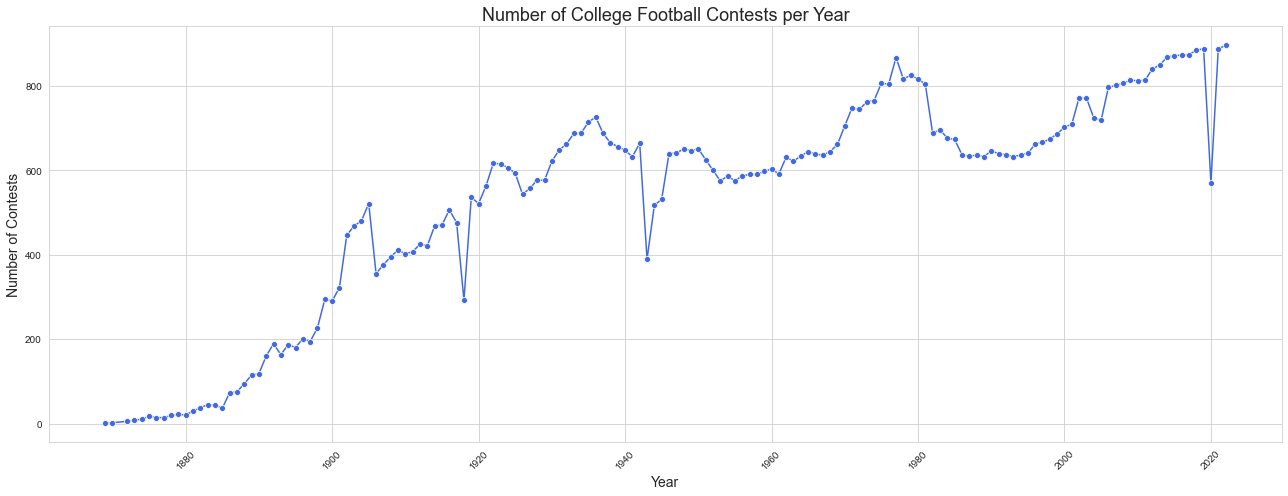

In [67]:
# Total Games per year

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style("whitegrid")

# Calculate the number of contests per year
games_per_year = cfb_data.groupby('Year').size()

# Plot the data
plt.figure(figsize=(18, 7))
sns.lineplot(x=games_per_year.index, y=games_per_year.values, marker='o', color='royalblue')

# Add title and labels
plt.title('Number of College Football Contests per Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Contests', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


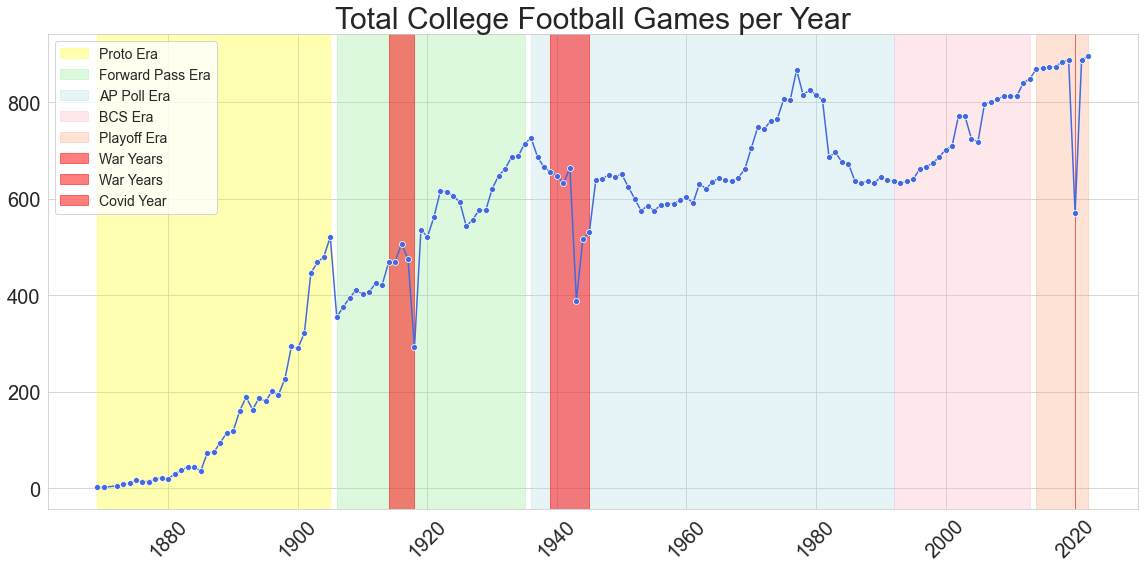

'TEMP\\cfb_game_per_year.png'

In [68]:
# Define era ranges and colors
era_ranges = [(1869, 1905), (1906, 1935), (1936, 1992), (1992, 2013), (2014, cfb_data['Year'].max())]
era_colors = ['yellow', 'lightgreen', 'lightblue', 'lightpink', 'lightsalmon']
era_names = [
    "Proto Era",
    "Forward Pass Era",
    "AP Poll Era",
    "BCS Era",
    "Playoff Era"
]

# Define war-affected periods
war_periods = [(1914, 1918), (1939, 1945)]  # WWI and WWII periods

# Define Covid period
covid_period = (2020, 2020)

# Plot the data
plt.figure(figsize=(16, 8))
sns.lineplot(x=games_per_year.index, y=games_per_year.values, marker='o', color='royalblue')

# Highlight eras
for (start, end), color, name in zip(era_ranges, era_colors, era_names):
    plt.axvspan(start, end, color=color, alpha=0.3, label=name)

# Highlight war-affected periods with red bars
for start, end in war_periods:
    plt.axvspan(start, end, color='red', alpha=0.5, label=f"War Years")

# High light Covid period
for start, end in [covid_period]:
    plt.axvspan(start, end, color='red', alpha=0.5, label=f"Covid Year")


# Increase font size and remove axis titles
plt.title('Total College Football Games per Year', fontsize=30)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.legend(loc='upper left', fontsize=14)
plt.xlabel('')
plt.ylabel('')

# Save the plot in high resolution suitable for social media
save_path = "TEMP\cfb_game_per_year.png"
plt.tight_layout()
plt.savefig(save_path, dpi=100)  # dpi=100 ensures the saved image is 1920x1080

# Display the plot
plt.show()

save_path


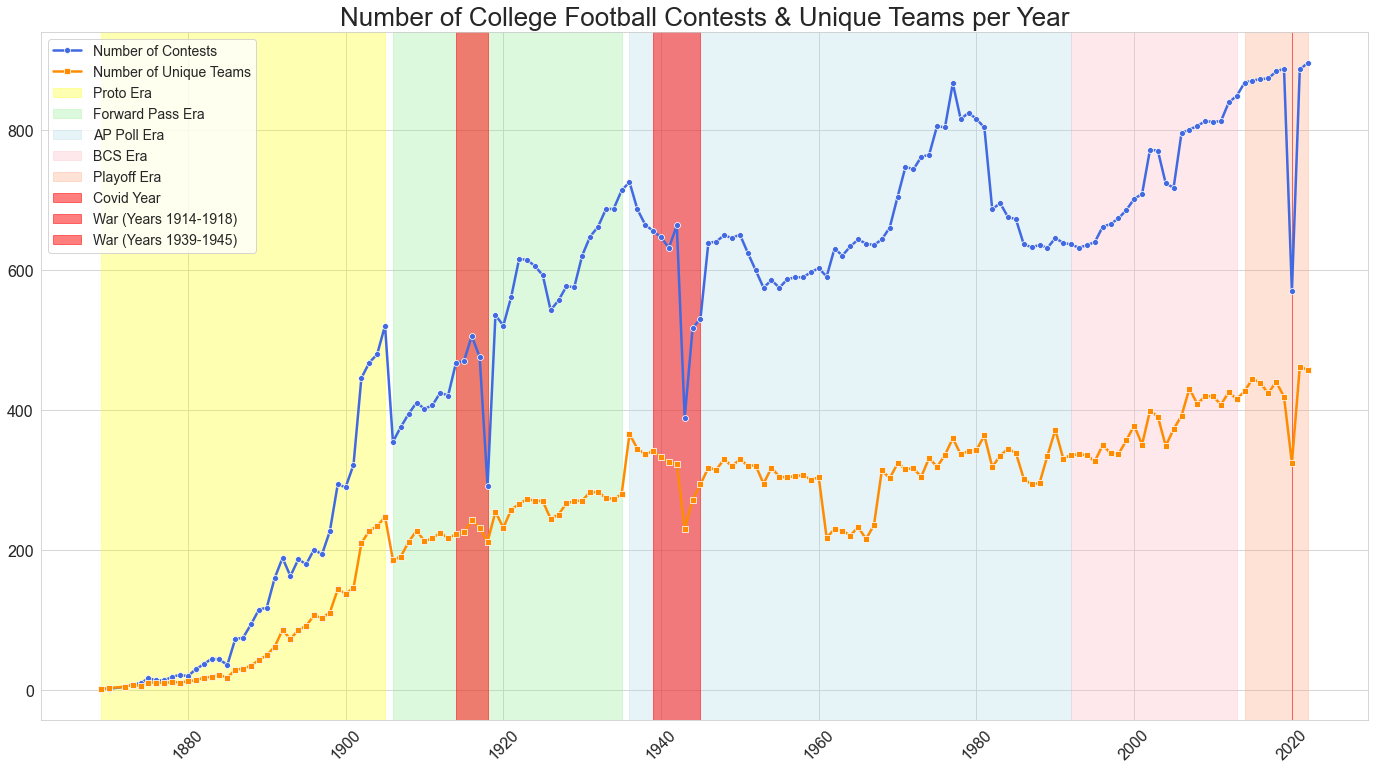

In [69]:
## With the number of unique teams also plotted

# Calculate number of unique teams for each year
unique_teams_per_year = cfb_data.groupby('Year').apply(lambda x: len(set(x['Winner']).union(set(x['Loser']))))


games_per_year = cfb_data.groupby('Year').size()

# Set figure size for landscape aspect ratio (16:9)
plt.figure(figsize=(19.2, 10.8))

# Plot the number of contests per year
sns.lineplot(x=games_per_year.index, y=games_per_year.values, marker='o', color='royalblue', linewidth=2.5, label='Number of Contests')

# Plot the number of unique teams per year
sns.lineplot(x=unique_teams_per_year.index, y=unique_teams_per_year.values, marker='s', color='darkorange', linewidth=2.5, label='Number of Unique Teams')

# Highlight eras
for (start, end), color, name in zip(era_ranges, era_colors, era_names):
    plt.axvspan(start, end, color=color, alpha=0.3, label=name)

# High light Covid period
for start, end in [covid_period]:
    plt.axvspan(start, end, color='red', alpha=0.5, label=f"Covid Year")

# Highlight war-affected periods with red bars
for start, end in war_periods:
    plt.axvspan(start, end, color='red', alpha=0.5, label=f"War (Years {start}-{end})")

# Increase font size and remove axis titles
plt.title('Number of College Football Contests & Unique Teams per Year', fontsize=26)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.xlabel('')
plt.ylabel('')

# Display the plot
plt.tight_layout()
plt.show()


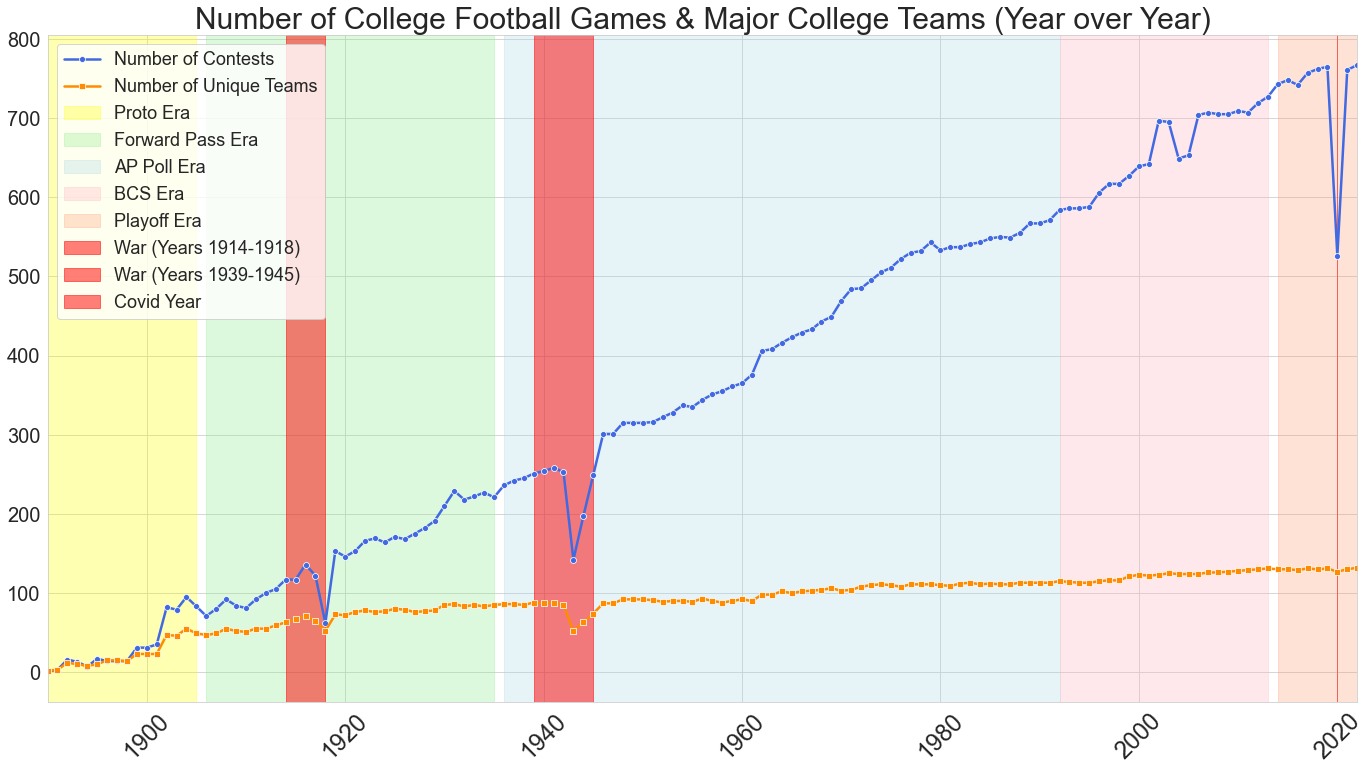

In [70]:
## Plot Just Games that involve at least one team on the list of FBS Schools

# Load dataframe that has already been filtered
df = pd.read_csv('TEMP/2FBS_Team_results_raw.csv')

cfb_data = df.copy()

games_per_year = cfb_data.groupby('Year').size()

## With the number of unique teams also plotted

# Calculate number of unique teams for each year
unique_teams_per_year = cfb_data.groupby('Year').apply(lambda x: len(set(x['Winner']).union(set(x['Loser']))))

# Set figure size for landscape aspect ratio (16:9)
plt.figure(figsize=(19.2, 10.8))

# Plot the number of contests per year
sns.lineplot(x=games_per_year.index, y=games_per_year.values, marker='o', color='royalblue', linewidth=2.5, label='Number of Contests')

# Plot the number of unique teams per year
sns.lineplot(x=unique_teams_per_year.index, y=unique_teams_per_year.values, marker='s', color='darkorange', linewidth=2.5, label='Number of Unique Teams')

# Highlight eras
for (start, end), color, name in zip(era_ranges, era_colors, era_names):
    plt.axvspan(start, end, color=color, alpha=0.3, label=name)

# Highlight war-affected periods with red bars
for start, end in war_periods:
    plt.axvspan(start, end, color='red', alpha=0.5, label=f"War (Years {start}-{end})")

# High light Covid period
for start, end in [covid_period]:
    plt.axvspan(start, end, color='red', alpha=0.5, label=f"Covid Year")

# Set range of graph to start at 1890
plt.xlim(1890, 2022)

# Increase font size and remove axis titles
plt.title('Number of College Football Games & Major College Teams (Year over Year)', fontsize=30)
plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=20)
plt.legend(loc='upper left', fontsize=18)
plt.xlabel('')
plt.ylabel('')

# Display the plot
plt.tight_layout()
plt.show()

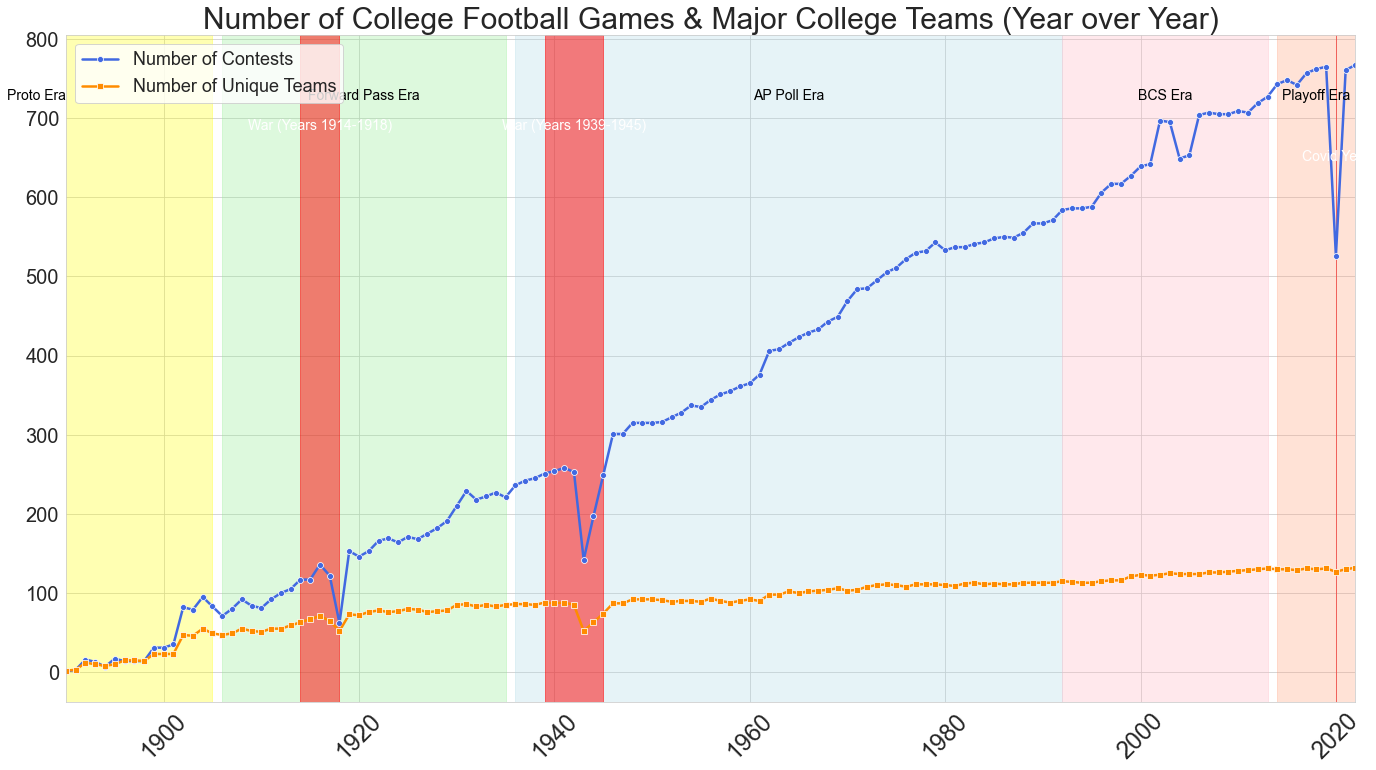

In [72]:
### Revision that moves era labels to the body of the plot and out of the legend



## Plot Just Games that involve at least one team on the list of FBS Schools

# Load dataframe that has already been filtered
df = pd.read_csv('TEMP/2FBS_Team_results_raw.csv')

cfb_data = df.copy()

games_per_year = cfb_data.groupby('Year').size()

## With the number of unique teams also plotted

# Calculate number of unique teams for each year
unique_teams_per_year = cfb_data.groupby('Year').apply(lambda x: len(set(x['Winner']).union(set(x['Loser']))))

# Set figure size for landscape aspect ratio (16:9)
plt.figure(figsize=(19.2, 10.8))


# ... (the rest of your code remains unchanged)

# Plot the number of contests per year
sns.lineplot(x=games_per_year.index, y=games_per_year.values, marker='o', color='royalblue', linewidth=2.5, label='Number of Contests')

# Plot the number of unique teams per year
sns.lineplot(x=unique_teams_per_year.index, y=unique_teams_per_year.values, marker='s', color='darkorange', linewidth=2.5, label='Number of Unique Teams')

# Highlight eras
for (start, end), color, name in zip(era_ranges, era_colors, era_names):
    plt.axvspan(start, end, color=color, alpha=0.3)  # Remove label argument
    mid_x = (start + end) / 2  # Calculate the midpoint of the shaded region
    max_y = max(games_per_year.max(), unique_teams_per_year.max())  # Find the max y value for positioning the text
    plt.text(mid_x, max_y * 0.95, name, horizontalalignment='center', verticalalignment='center', fontsize=14, color='black')  # Place the era name in the shaded region

# Highlight war-affected periods with red bars
for start, end in war_periods:
    plt.axvspan(start, end, color='red', alpha=0.5)
    # Optional: Add text for war-affected periods
    mid_x = (start + end) / 2
    max_y = max(games_per_year.max(), unique_teams_per_year.max())
    plt.text(mid_x, max_y * 0.90, f"War (Years {start}-{end})", horizontalalignment='center', verticalalignment='center', fontsize=14, color='white')

# High light Covid period
for start, end in [covid_period]:
    plt.axvspan(start, end, color='red', alpha=0.5)
    # Optional: Add text for Covid period
    mid_x = (start + end) / 2
    max_y = max(games_per_year.max(), unique_teams_per_year.max())
    plt.text(mid_x, max_y * 0.85, "Covid Year", horizontalalignment='center', verticalalignment='center', fontsize=14, color='white')


# Set range of graph to start at 1890
plt.xlim(1890, 2022)

# Increase font size and remove axis titles
plt.title('Number of College Football Games & Major College Teams (Year over Year)', fontsize=30)
plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=20)
plt.legend(loc='upper left', fontsize=18)
plt.xlabel('')
plt.ylabel('')

# Display the plot
plt.tight_layout()
plt.show()
